<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
from tqdm.notebook import tqdm
from datetime import datetime
import pandas as pd
import numpy as np
from scipy.stats import shapiro
from scipy.stats import normaltest
import sklearn.metrics as m
from tqdm.notebook import tqdm
from sklearn.metrics import mean_squared_error, f1_score,accuracy_score, precision_recall_curve, accuracy_score, classification_report, roc_curve, roc_auc_score, auc
from catboost import CatBoostClassifier, CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.preprocessing import Normalizer, StandardScaler, QuantileTransformer, RobustScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, Pool, cv, CatBoostRegressor
import lightgbm as lgb
import gc
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(precision=4)
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier, HistGradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import Perceptron, SGDClassifier, RidgeClassifier, PassiveAggressiveClassifier
from sklearn.svm import NuSVC

In [2]:
file_path_test = r'I:\Хакатоны\Цифровой прорыв Бургер Кинг\hackaton2023_test.gzip'
file_path_train  = r'I:\Хакатоны\Цифровой прорыв Бургер Кинг\train_dataset_hackaton2023_train.gzip'
file_path_menu = r'C:\Users\user\Downloads\Menu.xlsx'

In [3]:
df_test = pd.read_parquet(file_path_test)
df_test

,customer_id,group_name,revenue,startdatetime,dish_name,ownareaall_sqm,format_name
1773606,13220760,test,0.28,2022-12-22 13:09:11,"Липтон Лимон в бутылке 0,5л",174.40,Фудкорт с туалетом
4035564,30315975,test,139.99,2023-03-05 16:45:05,Пиво Балтика 7 0.5л розлив,235.00,Отдельно стоящий
2507770,21679985,test,36.00,2022-12-13 16:10:55,Кинг Фри мал,165.00,Фудкорт без туалета
3963775,29754274,test,230.00,2023-03-14 14:10:43,Цезарь ролл со стрипсами,150.00,Фудкорт без туалета
859943,7797823,test,204.96,2022-10-22 14:09:28,Up Гранд Чиз Фреш,114.50,Фудкорт без туалета
...,...,...,...,...,...,...,...
1677742,12727388,test,99.99,2023-04-29 10:12:21,Сырные Медальоны (6 шт.),92.00,Фудкорт без туалета
4450230,36332632,test,79.98,2023-02-12 19:57:23,"Липтон Грин Дж 0,3",216.93,Отдельно стоящий без внешней зоны
3882998,29278039,test,209.99,2022-11-08 15:39:53,Воппер Ролл,300.00,Отдельно стоящий с внешней зоной
1356999,11223378,test,679.98,2023-01-31 19:15:39,Двойной Воппер с сыром,136.50,Фудкорт без туалета


In [4]:
df_test.groupby('customer_id').count()

,group_name,revenue,startdatetime,dish_name,ownareaall_sqm,format_name
customer_id,,,,,,
52341,28,28,28,28,28,28
69175,49,49,49,49,49,49
73427,64,64,64,64,64,64
134577,12,12,12,12,12,12
156357,13,13,13,13,13,13
...,...,...,...,...,...,...
46540272,10,10,10,10,10,10
46569275,12,12,12,12,12,12
46601088,8,8,8,8,8,8


In [5]:
df_train = pd.read_parquet(file_path_train)
df_train = df_train.fillna(0)
df_train

,customer_id,date_diff_post,buy_post,group_name,revenue,startdatetime,dish_name,ownareaall_sqm,format_name
0,29891,9.0,1,train,69.99,2022-12-05 12:03:58,Кинг Фри станд,300.0,Отдельно стоящий без внешней зоны
1,29891,9.0,1,train,190.00,2022-12-05 12:03:58,Чикен Тар-Тар,300.0,Отдельно стоящий без внешней зоны
2,29891,9.0,1,train,9.99,2022-12-05 12:03:58,Соус Сырный,300.0,Отдельно стоящий без внешней зоны
3,29891,9.0,1,train,119.99,2022-12-05 12:03:58,Энергет.нап. Адреналин Раш,300.0,Отдельно стоящий без внешней зоны
4,29891,9.0,1,train,119.99,2022-12-05 14:28:35,Латте (СТАНД.),300.0,Отдельно стоящий без внешней зоны
...,...,...,...,...,...,...,...,...,...
24261974,46661804,0.0,0,train,7.99,2023-08-01 18:04:56,"Эвервесс Кола джун 0,3л",300.0,Фудкорт с туалетом
24261975,46661804,0.0,0,train,84.98,2023-08-01 18:04:56,Воппер Джуниор,300.0,Фудкорт с туалетом
24261976,46661804,0.0,0,train,70.03,2023-08-01 18:04:56,Наггетсы (3 шт.),300.0,Фудкорт с туалетом
24261977,46661804,0.0,0,train,19.00,2023-08-01 18:04:56,Сырные Медальоны (3 шт.),300.0,Фудкорт с туалетом


In [6]:
xx = df_train[['customer_id','buy_post']].groupby(['customer_id','buy_post']).count().reset_index()

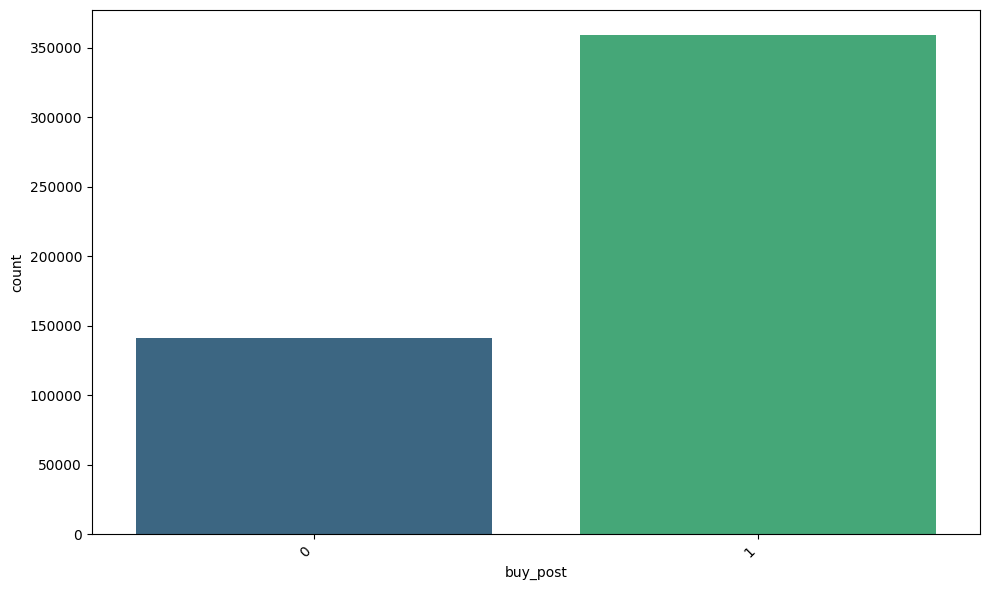

In [7]:

plt.figure(figsize=(10, 6))
sns.barplot(x='buy_post', y='count', data=xx['buy_post'].value_counts().reset_index(), palette='viridis')

plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

In [8]:
len(set(df_train['dish_name'])-set(df_test['dish_name']))

77

In [9]:
set(df_test['dish_name'])-set(df_train['dish_name'])

{'Up Капучино Ваниль (БОЛ.) за 1руб',
 'Up Латте Ваниль (БОЛ.) за 1руб',
 'Up Липтон Лимон  мал 0,4',
 'Up Роял Фри new',
 'Up Чеддер Начос Кинг с курицей',
 'lim.Кола без сахара мал 0,4',
 'Острый Гранд Чиз Фреш Двойной',
 'Острый Тройной Воппер',
 'Пепси Манго XL 1л',
 'Сбер.Кофе (СТАНД.) за 1руб',
 'Севен Ап XL 1л'}

In [10]:
len(set(df_train['customer_id'])&set(df_test['customer_id']))

0

In [11]:
sorted(set(df_train['dish_name']) | set(df_test['dish_name']))

['1RUB.АНГУС Шеф new',
 '1RUB.Ангус 4 Сыра',
 '1RUB.Вода Аква Минерале без газа 0,5л',
 '1RUB.Вода Аква Минерале с газом 0,5л',
 '1RUB.Воппер',
 '1RUB.Гамбургер',
 '1RUB.Гранд Чиз',
 '1RUB.Гранд Чиз Фреш',
 '1RUB.Двойной Чизбургер',
 '1RUB.Дюшес б/л стандарт 0,5',
 '1RUB.Дюшес стандарт 0,5',
 '1RUB.Капучино (БОЛ.)',
 '1RUB.Карт. Деревен. джун',
 '1RUB.Карт. Деревен. мал',
 '1RUB.Кинг Фри мал',
 '1RUB.Кинг Фри станд',
 '1RUB.Кола б/л стандарт 0,5',
 '1RUB.Кола стандарт 0,5',
 '1RUB.Крылышки (6 шт.)',
 '1RUB.Латте (БОЛ.)',
 '1RUB.Лимонад б/л стандарт 0,5',
 '1RUB.Лимонад стандарт 0,5',
 '1RUB.Липтон Грин стандарт 0,5',
 '1RUB.Липтон Зеленый Чай в бутылке 0,5л',
 '1RUB.Липтон Лимон в бутылке 0,5л',
 '1RUB.Липтон Лимон стандарт 0,5',
 '1RUB.Мандарин б/л стандарт 0,5',
 '1RUB.Мандарин стандарт 0,5',
 '1RUB.Миринда в бутылке 0,5л',
 '1RUB.Наггетсы (6 шт.)',
 '1RUB.Пирожок с вишней',
 '1RUB.Рожок',
 '1RUB.Сырные Медальоны (6 шт.)',
 '1RUB.Улитка с Корицей',
 '1RUB.Цезарь ролл со стрипсами',
 

In [12]:
df = pd.concat([df_train, df_test])
df['buy_post'].value_counts()

buy_post
1.0    9660867
0.0    2468517
Name: count, dtype: int64

In [13]:
df_target = df.groupby(['customer_id','date_diff_post','buy_post','group_name','startdatetime'])['dish_name'].count().reset_index()
df_target['buy_post'].value_counts()

buy_post
1.0    2292753
0.0     587833
Name: count, dtype: int64

In [14]:
df_target 

,customer_id,date_diff_post,buy_post,group_name,startdatetime,dish_name
0,29891,9.0,1.0,train,2022-12-05 12:03:58,4
1,29891,9.0,1.0,train,2022-12-05 14:28:35,1
2,29891,9.0,1.0,train,2022-12-15 00:37:19,2
3,29891,9.0,1.0,train,2022-12-20 09:20:38,1
4,29891,9.0,1.0,train,2022-12-21 09:46:23,1
...,...,...,...,...,...,...
2880581,46654016,15.0,1.0,train,2023-08-01 14:04:28,1
2880582,46654016,15.0,1.0,train,2023-08-01 18:15:31,2
2880583,46661804,0.0,0.0,train,2023-08-01 17:50:26,3
2880584,46661804,0.0,0.0,train,2023-08-01 18:01:40,6


In [15]:
df = df.drop(['date_diff_post','buy_post'], axis=1)

In [16]:
df['ownareaall_sqm'] = df['ownareaall_sqm'].fillna(df['ownareaall_sqm'].median())

<Axes: >

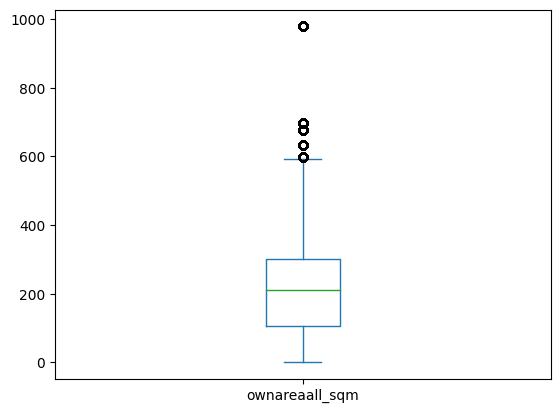

In [17]:
df['ownareaall_sqm'].plot.box()

In [18]:
bins = [100, 200, 300, 500, 600]
df['ownareaall_sqm'] = pd.cut(df['ownareaall_sqm'], bins=bins)

In [19]:
df['ownareaall_sqm'] = df['ownareaall_sqm'].astype(str).replace({'nan': 'xxx'})

In [20]:
menu = pd.read_excel(file_path_menu)
menu 

,dish_name,Категория
0,1RUB.Ангус 4 Сыра,Бургер
1,1RUB.АНГУС Шеф new,Бургер
2,"1RUB.Вода Аква Минерале без газа 0,5л",Напитки
3,"1RUB.Вода Аква Минерале с газом 0,5л",Напитки
4,1RUB.Воппер,Воппер
...,...,...
1044,Острый Гранд Чиз Фреш Двойной,Бургер
1045,Острый Тройной Воппер,Воппер
1046,Пепси Манго XL 1л,Напитки
1047,Сбер.Кофе (СТАНД.) за 1руб,Кофе


In [21]:
menu = pd.read_excel(file_path_menu)
df['dish_name'] = pd.merge(df['dish_name'], menu, on='dish_name')['Категория']
one_hot_encoding = pd.get_dummies(df['dish_name'], prefix='dish')
df_concat = pd.concat([df, one_hot_encoding], axis=1)
df_concat

,customer_id,group_name,revenue,startdatetime,dish_name,ownareaall_sqm,format_name,dish_Бургер,dish_Воппер,dish_Десерты,...,dish_Прочее,dish_Ролл,dish_Салат,dish_Салфетка,dish_Фри,dish_Чай,dish_Шейк,dish_наггетсы,dish_соус,dish_чипсы
0,29891,train,69.99,2022-12-05 12:03:58,Фри,"(200, 300]",Отдельно стоящий без внешней зоны,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,29891,train,190.00,2022-12-05 12:03:58,Фри,"(200, 300]",Отдельно стоящий без внешней зоны,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,29891,train,9.99,2022-12-05 12:03:58,Фри,"(200, 300]",Отдельно стоящий без внешней зоны,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,29891,train,119.99,2022-12-05 12:03:58,Фри,"(200, 300]",Отдельно стоящий без внешней зоны,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,29891,train,119.99,2022-12-05 14:28:35,Фри,"(200, 300]",Отдельно стоящий без внешней зоны,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677742,12727388,test,99.99,2023-04-29 10:12:21,Бургер,xxx,Фудкорт без туалета,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4450230,36332632,test,79.98,2023-02-12 19:57:23,наггетсы,"(200, 300]",Отдельно стоящий без внешней зоны,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3882998,29278039,test,209.99,2022-11-08 15:39:53,Фри,"(200, 300]",Отдельно стоящий с внешней зоной,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1356999,11223378,test,679.98,2023-01-31 19:15:39,Бургер,"(100, 200]",Фудкорт без туалета,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
df['dish_name']

0               Фри
1               Фри
2               Фри
3               Фри
4               Фри
             ...   
1677742      Бургер
4450230    наггетсы
3882998         Фри
1356999      Бургер
3964741         Фри
Name: dish_name, Length: 14627418, dtype: object

In [23]:
len(set(df['dish_name'] ))

18

In [24]:
one_hot_encoding = pd.get_dummies(df['dish_name'], prefix='dish')
one_hot_encoding

,dish_Бургер,dish_Воппер,dish_Десерты,dish_Кофе,dish_Креветки,dish_Напитки,dish_Пиво,dish_Прочее,dish_Ролл,dish_Салат,dish_Салфетка,dish_Фри,dish_Чай,dish_Шейк,dish_наггетсы,dish_соус,dish_чипсы
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677742,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4450230,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3882998,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1356999,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
df_concat = pd.concat([df, one_hot_encoding], axis=1)
df_concat

,customer_id,group_name,revenue,startdatetime,dish_name,ownareaall_sqm,format_name,dish_Бургер,dish_Воппер,dish_Десерты,...,dish_Прочее,dish_Ролл,dish_Салат,dish_Салфетка,dish_Фри,dish_Чай,dish_Шейк,dish_наггетсы,dish_соус,dish_чипсы
0,29891,train,69.99,2022-12-05 12:03:58,Фри,"(200, 300]",Отдельно стоящий без внешней зоны,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,29891,train,190.00,2022-12-05 12:03:58,Фри,"(200, 300]",Отдельно стоящий без внешней зоны,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,29891,train,9.99,2022-12-05 12:03:58,Фри,"(200, 300]",Отдельно стоящий без внешней зоны,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,29891,train,119.99,2022-12-05 12:03:58,Фри,"(200, 300]",Отдельно стоящий без внешней зоны,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,29891,train,119.99,2022-12-05 14:28:35,Фри,"(200, 300]",Отдельно стоящий без внешней зоны,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677742,12727388,test,99.99,2023-04-29 10:12:21,Бургер,xxx,Фудкорт без туалета,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4450230,36332632,test,79.98,2023-02-12 19:57:23,наггетсы,"(200, 300]",Отдельно стоящий без внешней зоны,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3882998,29278039,test,209.99,2022-11-08 15:39:53,Фри,"(200, 300]",Отдельно стоящий с внешней зоной,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1356999,11223378,test,679.98,2023-01-31 19:15:39,Бургер,"(100, 200]",Фудкорт без туалета,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
one_hot_encoding = pd.get_dummies(df['format_name'], prefix='format')
df_concat = pd.concat([df_concat, one_hot_encoding], axis=1)
df_concat

,customer_id,group_name,revenue,startdatetime,dish_name,ownareaall_sqm,format_name,dish_Бургер,dish_Воппер,dish_Десерты,...,dish_чипсы,format_Не заполнено,format_Отдельно стоящий,format_Отдельно стоящий без внешней зоны,format_Отдельно стоящий без внешней зоны без туалета,format_Отдельно стоящий без туалета,format_Отдельно стоящий с внешн.зоной без туалета,format_Отдельно стоящий с внешней зоной,format_Фудкорт без туалета,format_Фудкорт с туалетом
0,29891,train,69.99,2022-12-05 12:03:58,Фри,"(200, 300]",Отдельно стоящий без внешней зоны,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,29891,train,190.00,2022-12-05 12:03:58,Фри,"(200, 300]",Отдельно стоящий без внешней зоны,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,29891,train,9.99,2022-12-05 12:03:58,Фри,"(200, 300]",Отдельно стоящий без внешней зоны,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,29891,train,119.99,2022-12-05 12:03:58,Фри,"(200, 300]",Отдельно стоящий без внешней зоны,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,29891,train,119.99,2022-12-05 14:28:35,Фри,"(200, 300]",Отдельно стоящий без внешней зоны,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677742,12727388,test,99.99,2023-04-29 10:12:21,Бургер,xxx,Фудкорт без туалета,True,False,False,...,False,False,False,False,False,False,False,False,True,False
4450230,36332632,test,79.98,2023-02-12 19:57:23,наггетсы,"(200, 300]",Отдельно стоящий без внешней зоны,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3882998,29278039,test,209.99,2022-11-08 15:39:53,Фри,"(200, 300]",Отдельно стоящий с внешней зоной,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1356999,11223378,test,679.98,2023-01-31 19:15:39,Бургер,"(100, 200]",Фудкорт без туалета,True,False,False,...,False,False,False,False,False,False,False,False,True,False


In [27]:
one_hot_encoding = pd.get_dummies(df['ownareaall_sqm'], prefix='ownareaall')
df_concat = pd.concat([df_concat, one_hot_encoding], axis=1)
df_concat

,customer_id,group_name,revenue,startdatetime,dish_name,ownareaall_sqm,format_name,dish_Бургер,dish_Воппер,dish_Десерты,...,format_Отдельно стоящий без туалета,format_Отдельно стоящий с внешн.зоной без туалета,format_Отдельно стоящий с внешней зоной,format_Фудкорт без туалета,format_Фудкорт с туалетом,"ownareaall_(100, 200]","ownareaall_(200, 300]","ownareaall_(300, 500]","ownareaall_(500, 600]",ownareaall_xxx
0,29891,train,69.99,2022-12-05 12:03:58,Фри,"(200, 300]",Отдельно стоящий без внешней зоны,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,29891,train,190.00,2022-12-05 12:03:58,Фри,"(200, 300]",Отдельно стоящий без внешней зоны,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,29891,train,9.99,2022-12-05 12:03:58,Фри,"(200, 300]",Отдельно стоящий без внешней зоны,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,29891,train,119.99,2022-12-05 12:03:58,Фри,"(200, 300]",Отдельно стоящий без внешней зоны,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,29891,train,119.99,2022-12-05 14:28:35,Фри,"(200, 300]",Отдельно стоящий без внешней зоны,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677742,12727388,test,99.99,2023-04-29 10:12:21,Бургер,xxx,Фудкорт без туалета,True,False,False,...,False,False,False,True,False,False,False,False,False,True
4450230,36332632,test,79.98,2023-02-12 19:57:23,наггетсы,"(200, 300]",Отдельно стоящий без внешней зоны,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3882998,29278039,test,209.99,2022-11-08 15:39:53,Фри,"(200, 300]",Отдельно стоящий с внешней зоной,False,False,False,...,False,False,True,False,False,False,True,False,False,False
1356999,11223378,test,679.98,2023-01-31 19:15:39,Бургер,"(100, 200]",Фудкорт без туалета,True,False,False,...,False,False,False,True,False,True,False,False,False,False


In [28]:
weekday_mapping = {0: 'Понедельник', 1: 'Вторник', 2: 'Среда', 3: 'Четверг', 4: 'Пятница', 5: 'Суббота', 6: 'Воскресенье'}
df['день_недели'] = df['startdatetime'].dt.weekday.map(weekday_mapping)

In [29]:
one_hot_encoding = pd.get_dummies(df['день_недели'], prefix='день_')
df_concat = pd.concat([df_concat, one_hot_encoding], axis=1)
df_concat

,customer_id,group_name,revenue,startdatetime,dish_name,ownareaall_sqm,format_name,dish_Бургер,dish_Воппер,dish_Десерты,...,"ownareaall_(300, 500]","ownareaall_(500, 600]",ownareaall_xxx,день__Воскресенье,день__Вторник,день__Понедельник,день__Пятница,день__Среда,день__Суббота,день__Четверг
0,29891,train,69.99,2022-12-05 12:03:58,Фри,"(200, 300]",Отдельно стоящий без внешней зоны,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,29891,train,190.00,2022-12-05 12:03:58,Фри,"(200, 300]",Отдельно стоящий без внешней зоны,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,29891,train,9.99,2022-12-05 12:03:58,Фри,"(200, 300]",Отдельно стоящий без внешней зоны,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,29891,train,119.99,2022-12-05 12:03:58,Фри,"(200, 300]",Отдельно стоящий без внешней зоны,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,29891,train,119.99,2022-12-05 14:28:35,Фри,"(200, 300]",Отдельно стоящий без внешней зоны,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677742,12727388,test,99.99,2023-04-29 10:12:21,Бургер,xxx,Фудкорт без туалета,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4450230,36332632,test,79.98,2023-02-12 19:57:23,наггетсы,"(200, 300]",Отдельно стоящий без внешней зоны,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3882998,29278039,test,209.99,2022-11-08 15:39:53,Фри,"(200, 300]",Отдельно стоящий с внешней зоной,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1356999,11223378,test,679.98,2023-01-31 19:15:39,Бургер,"(100, 200]",Фудкорт без туалета,True,False,False,...,False,False,False,False,True,False,False,False,False,False


In [30]:
def time_of_day(row):
    hour = row.hour
    if 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'day'
    else:
        return 'evening'

# Applying the function to the startdatetime column
df['время_суток'] = df['startdatetime'].apply(time_of_day)

In [31]:
one_hot_encoding = pd.get_dummies(df['время_суток'], prefix='время_')
df_concat = pd.concat([df_concat, one_hot_encoding], axis=1)
df_concat

,customer_id,group_name,revenue,startdatetime,dish_name,ownareaall_sqm,format_name,dish_Бургер,dish_Воппер,dish_Десерты,...,день__Воскресенье,день__Вторник,день__Понедельник,день__Пятница,день__Среда,день__Суббота,день__Четверг,время__day,время__evening,время__morning
0,29891,train,69.99,2022-12-05 12:03:58,Фри,"(200, 300]",Отдельно стоящий без внешней зоны,False,False,False,...,False,False,True,False,False,False,False,True,False,False
1,29891,train,190.00,2022-12-05 12:03:58,Фри,"(200, 300]",Отдельно стоящий без внешней зоны,False,False,False,...,False,False,True,False,False,False,False,True,False,False
2,29891,train,9.99,2022-12-05 12:03:58,Фри,"(200, 300]",Отдельно стоящий без внешней зоны,False,False,False,...,False,False,True,False,False,False,False,True,False,False
3,29891,train,119.99,2022-12-05 12:03:58,Фри,"(200, 300]",Отдельно стоящий без внешней зоны,False,False,False,...,False,False,True,False,False,False,False,True,False,False
4,29891,train,119.99,2022-12-05 14:28:35,Фри,"(200, 300]",Отдельно стоящий без внешней зоны,False,False,False,...,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677742,12727388,test,99.99,2023-04-29 10:12:21,Бургер,xxx,Фудкорт без туалета,True,False,False,...,False,False,False,False,False,True,False,False,False,True
4450230,36332632,test,79.98,2023-02-12 19:57:23,наггетсы,"(200, 300]",Отдельно стоящий без внешней зоны,False,False,False,...,True,False,False,False,False,False,False,False,True,False
3882998,29278039,test,209.99,2022-11-08 15:39:53,Фри,"(200, 300]",Отдельно стоящий с внешней зоной,False,False,False,...,False,True,False,False,False,False,False,True,False,False
1356999,11223378,test,679.98,2023-01-31 19:15:39,Бургер,"(100, 200]",Фудкорт без туалета,True,False,False,...,False,True,False,False,False,False,False,False,True,False


In [32]:
df_concat = df_concat.drop(['dish_name','ownareaall_sqm','format_name'], axis=1).groupby(['customer_id','group_name','startdatetime']).mean().reset_index()
df_concat

,customer_id,group_name,startdatetime,revenue,dish_Бургер,dish_Воппер,dish_Десерты,dish_Кофе,dish_Креветки,dish_Напитки,...,день__Воскресенье,день__Вторник,день__Понедельник,день__Пятница,день__Среда,день__Суббота,день__Четверг,время__day,время__evening,время__morning
0,29891,train,2022-12-05 12:03:58,97.492500,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,29891,train,2022-12-05 14:28:35,119.990000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,29891,train,2022-12-15 00:37:19,134.995000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,29891,train,2022-12-20 09:20:38,144.970000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,29891,train,2022-12-21 09:46:23,184.960000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3472854,46661804,train,2023-08-01 18:01:40,47.495000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3472855,46661804,train,2023-08-01 18:04:56,48.328333,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3472856,46668221,test,2023-08-01 20:46:27,168.116250,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3472857,46668221,test,2023-08-01 20:56:56,194.990000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
df_concat = df_concat.sort_values('startdatetime', ascending=False)
df_concat

,customer_id,group_name,startdatetime,revenue,dish_Бургер,dish_Воппер,dish_Десерты,dish_Кофе,dish_Креветки,dish_Напитки,...,день__Воскресенье,день__Вторник,день__Понедельник,день__Пятница,день__Среда,день__Суббота,день__Четверг,время__day,время__evening,время__morning
3450432,44695278,train,2023-08-01 23:57:46,99.990000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2863506,30984546,train,2023-08-01 23:57:36,112.495000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1845466,22436078,train,2023-08-01 23:54:12,109.987500,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3378186,41586357,train,2023-08-01 23:54:09,49.998333,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3471693,46198579,train,2023-08-01 23:53:26,149.990000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546445,28039329,test,2022-09-02 00:04:00,393.320000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2180271,24774791,train,2022-09-02 00:02:24,109.990000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
808009,9876699,train,2022-09-02 00:02:21,309.150000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3032918,34478910,train,2022-09-02 00:02:12,89.990000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [34]:
t = df_concat.pivot_table(index='customer_id', columns=df_concat.groupby('customer_id').cumcount(), values='revenue', fill_value=0)

In [35]:
t

,0,1,2,3,4,5,6,7,8,9,...,235,236,237,238,239,240,241,242,243,244
customer_id,,,,,,,,,,,,,,,,,,,,,
29891,439.980000,264.960000,1.000000,329.960000,1.000,84.990000,74.995000,179.980000,249.96,149.990,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
30477,44.990000,76.663333,76.663333,299.980000,99.990,76.663333,76.663333,299.980000,99.99,17.745,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
31426,44.990000,49.998333,145.711429,154.993333,125.996,33.330000,137.497500,71.656667,72.49,215.994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
44491,23.330000,24.985000,24.985000,114.990000,0.000,0.000000,0.000000,0.000000,0.00,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
44939,72.137143,61.660000,67.214444,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46632765,96.660000,209.990000,119.990000,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
46639170,103.992000,99.992500,84.995000,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
46654016,284.990000,179.990000,156.653333,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0


In [36]:
# df_concat = pd.merge(df_concat,t, on='customer_id')
# df_concat
t1 = df_concat.groupby('customer_id')['revenue'].diff()
df_concat['revenue_diff'] = df_concat.reset_index().fillna(0).groupby('index')['revenue'].mean()
df_concat

,customer_id,group_name,startdatetime,revenue,dish_Бургер,dish_Воппер,dish_Десерты,dish_Кофе,dish_Креветки,dish_Напитки,...,день__Вторник,день__Понедельник,день__Пятница,день__Среда,день__Суббота,день__Четверг,время__day,время__evening,время__morning,revenue_diff
3450432,44695278,train,2023-08-01 23:57:46,99.990000,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,99.990000
2863506,30984546,train,2023-08-01 23:57:36,112.495000,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,112.495000
1845466,22436078,train,2023-08-01 23:54:12,109.987500,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,109.987500
3378186,41586357,train,2023-08-01 23:54:09,49.998333,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,49.998333
3471693,46198579,train,2023-08-01 23:53:26,149.990000,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,149.990000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546445,28039329,test,2022-09-02 00:04:00,393.320000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,393.320000
2180271,24774791,train,2022-09-02 00:02:24,109.990000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,109.990000
808009,9876699,train,2022-09-02 00:02:21,309.150000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,309.150000
3032918,34478910,train,2022-09-02 00:02:12,89.990000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,89.990000


In [226]:
burger_df = pd.read_parquet(file_path_train)
burger_df.shape

(12129384, 9)

In [227]:
burger_df.head(3)

,customer_id,date_diff_post,buy_post,group_name,revenue,startdatetime,dish_name,ownareaall_sqm,format_name
0,29891,9.0,1,train,69.99,2022-12-05 12:03:58,Кинг Фри станд,300.0,Отдельно стоящий без внешней зоны
1,29891,9.0,1,train,190.00,2022-12-05 12:03:58,Чикен Тар-Тар,300.0,Отдельно стоящий без внешней зоны
2,29891,9.0,1,train,9.99,2022-12-05 12:03:58,Соус Сырный,300.0,Отдельно стоящий без внешней зоны


# Фичи из даты и времени

In [228]:
burger_df[burger_df['customer_id'] == 29891]


,customer_id,date_diff_post,buy_post,group_name,revenue,startdatetime,dish_name,ownareaall_sqm,format_name
0,29891,9.0,1,train,69.99,2022-12-05 12:03:58,Кинг Фри станд,300.0,Отдельно стоящий без внешней зоны
1,29891,9.0,1,train,190.00,2022-12-05 12:03:58,Чикен Тар-Тар,300.0,Отдельно стоящий без внешней зоны
2,29891,9.0,1,train,9.99,2022-12-05 12:03:58,Соус Сырный,300.0,Отдельно стоящий без внешней зоны
3,29891,9.0,1,train,119.99,2022-12-05 12:03:58,Энергет.нап. Адреналин Раш,300.0,Отдельно стоящий без внешней зоны
4,29891,9.0,1,train,119.99,2022-12-05 14:28:35,Латте (СТАНД.),300.0,Отдельно стоящий без внешней зоны
5,29891,9.0,1,train,60.00,2022-12-15 00:37:19,Чизбургер,463.0,Отдельно стоящий с внешней зоной
6,29891,9.0,1,train,209.99,2022-12-15 00:37:19,Воппер Ролл,463.0,Отдельно стоящий с внешней зоной
7,29891,9.0,1,train,144.97,2022-12-20 09:20:38,ЧизБекон Чикен Гамбургер,463.0,Отдельно стоящий с внешней зоной
8,29891,9.0,1,train,184.96,2022-12-21 09:46:23,Цезарь Кинг новый,463.0,Отдельно стоящий с внешней зоной
9,29891,9.0,1,train,84.99,2022-12-21 13:12:09,Flash Up,463.0,Отдельно стоящий с внешней зоной


In [229]:
# Период за который предоставлены данные
burger_df['startdatetime'].min(), burger_df['startdatetime'].max()

(Timestamp('2022-09-02 00:00:39'), Timestamp('2023-08-01 23:57:46'))

In [230]:
# Раскладываем даты по возможным начениям
burger_df['date'] = burger_df['startdatetime'].dt.date
burger_df['date'] = pd.to_datetime(burger_df['date'])
burger_df['year'] = burger_df['startdatetime'].dt.year
burger_df['month'] = burger_df['startdatetime'].dt.month
burger_df['day'] = burger_df['startdatetime'].dt.day
burger_df['day_of_week'] = burger_df['startdatetime'].dt.day_of_week
burger_df['day_of_year'] = burger_df['startdatetime'].dt.day_of_year
burger_df['days_in_month'] = burger_df['startdatetime'].dt.days_in_month
burger_df['quarter'] = burger_df['startdatetime'].dt.quarter
burger_df['week'] = burger_df['startdatetime'].dt.isocalendar().week
burger_df['hour'] = burger_df['startdatetime'].dt.hour


In [231]:
# Для группировки данных по дням определяем начальную дату и сколько прошло дней с этого момента
date_2022 = datetime.strptime("2022-01-01", "%Y-%m-%d", ).replace(tzinfo=None)
burger_df['day_count'] = ((burger_df['startdatetime'] - date_2022) / np.timedelta64(1, 'D')).astype(int)
# Для группировки данных по три часа также устанавливаем для каждой значения группу
burger_df['hour_count'] = ((burger_df['startdatetime'] - date_2022) / np.timedelta64(3, 'h')).astype(int)
# Создаем датафрейм для итоговых агрегатов по клиентам
customer_df = pd.DataFrame()
# pd.DataFrame(position_by_day_df).reset_index().groupby(by=['customer_id'])['dish_name'].mean()
# burger_df.groupby(by=['customer_id'])['dish_name'].mean()

In [232]:
# Сколько позиций в заданный период времени
def calc_position_by_time(period_column:str='day_count'):
    position_by_time = burger_df.groupby(by=['customer_id', period_column])['dish_name'].count()
    mean_position_by_time = pd.DataFrame(position_by_time).reset_index().groupby(by=['customer_id'])['dish_name'].mean()
    mean_position_by_time = pd.DataFrame(mean_position_by_time).reset_index()
    mean_position_by_time = mean_position_by_time.rename(columns={'dish_name':f'mean_position_by_{period_column}'}).set_index('customer_id')
    return mean_position_by_time

In [233]:
# Сколько позиций в день
mean_position_by_day = calc_position_by_time(period_column='day_count')
# Сколько позиций в три часа
mean_position_by_3hour = calc_position_by_time(period_column='hour_count')
# Сколько позиций в час
mean_position_by_hour = calc_position_by_time(period_column='hour')

customer_df = pd.concat([customer_df, mean_position_by_day, mean_position_by_3hour, mean_position_by_hour], axis=1)
customer_df.shape

# Формируем сгруппированый датафрейм по посещениям за каждый день по каждому клиенту
visited_days_df = burger_df.groupby(by=['customer_id', 'date'])['dish_name'].count()
visited_days_df = pd.DataFrame(visited_days_df).reset_index()


In [234]:
def calc_stat_visited_by_period(period:str='1D'):
    calc_visited_df = pd.DataFrame([])
    select_group_visited = visited_days_df.set_index('date').groupby('customer_id')['customer_id'].rolling(period).count().groupby(by=['customer_id'])
    # calc_visited_df[f'count_visited_by_{period}'] = select_group_visited.count()
    calc_visited_df[f'max_visited_by_{period}'] = select_group_visited.max()
    calc_visited_df[f'mean_visited_by_{period}'] = select_group_visited.mean()
    return calc_visited_df

In [235]:
%%time
union_visited_df = pd.DataFrame(visited_days_df.set_index('date').groupby('customer_id')['customer_id'].rolling('1D').count().groupby(by=['customer_id']).count().rename('count_visited'))
for period in ['2D', '3D', '5D', '7D', '14D', '21D', '30D', '60D']:
    print(f'calc period: {period}')
    visited_df = calc_stat_visited_by_period(period=period)
    union_visited_df = pd.concat([union_visited_df, visited_df], axis=1)
union_visited_df.shape

union_visited_df

customer_df = pd.concat([customer_df, union_visited_df], axis=1)
customer_df.shape

last_row_burger_columns = ['format_name', 'year', 'month', 'day', 
                         'day_count', 'day_of_week', 'day_of_year', 
                         'days_in_month', 'quarter', 'week', 
                         'hour_count', 'hour', 'date']
last_row_df = burger_df[['customer_id', 'startdatetime'] + last_row_burger_columns].sort_values(by='startdatetime').groupby(by=['customer_id'])[last_row_burger_columns].last()
last_row_df.shape

customer_df = pd.concat([customer_df, last_row_df], axis=1)
customer_df.shape

target_df = burger_df.groupby(by=['customer_id'])[['buy_post', 'date_diff_post']].last()
target_df.shape

customer_df = pd.concat([customer_df, target_df], axis=1)
customer_df.shape


calc period: 2D
calc period: 3D
calc period: 5D
calc period: 7D
calc period: 14D
calc period: 21D
calc period: 30D
calc period: 60D
CPU times: total: 3min 21s
Wall time: 3min 23s


(500000, 35)

In [236]:
customer_df.reset_index()

,customer_id,mean_position_by_day_count,mean_position_by_hour_count,mean_position_by_hour,count_visited,max_visited_by_2D,mean_visited_by_2D,max_visited_by_3D,mean_visited_by_3D,max_visited_by_5D,...,day_of_week,day_of_year,days_in_month,quarter,week,hour_count,hour,date,buy_post,date_diff_post
0,29891,1.789474,1.478261,3.400000,19,2.0,1.526316,3.0,1.894737,5.0,...,2,32,28,1,5,3171,9,2023-02-01,1,9.0
1,30477,2.904762,2.541667,7.625000,21,2.0,1.571429,3.0,1.904762,5.0,...,4,329,30,4,47,2626,8,2022-11-25,1,10.0
2,31426,4.300000,3.739130,7.818182,20,2.0,1.350000,3.0,1.700000,5.0,...,5,182,31,3,26,4374,20,2023-07-01,1,4.0
3,44491,3.333333,3.333333,3.333333,3,2.0,1.333333,2.0,1.333333,2.0,...,5,189,31,3,27,4430,18,2023-07-08,1,42.0
4,44939,8.333333,8.333333,8.333333,3,1.0,1.000000,1.0,1.000000,1.0,...,6,359,31,4,51,2871,22,2022-12-25,1,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,46624509,5.500000,3.666667,3.666667,2,2.0,1.500000,2.0,1.500000,2.0,...,1,213,31,3,31,4621,17,2023-08-01,0,NaN
499996,46625265,13.000000,13.000000,13.000000,1,1.0,1.000000,1.0,1.000000,1.0,...,0,212,31,3,31,4613,15,2023-07-31,0,NaN
499997,46639170,11.000000,5.500000,3.666667,1,1.0,1.000000,1.0,1.000000,1.0,...,0,212,31,3,31,4615,21,2023-07-31,1,10.0
499998,46654016,6.000000,3.000000,2.000000,1,1.0,1.000000,1.0,1.000000,1.0,...,1,213,31,3,31,4622,18,2023-08-01,1,15.0


# Basse Model

In [237]:
df_train = df_concat[df_concat['group_name'] == 'train']
df_target['buy_post'].value_counts()

buy_post
1.0    2292753
0.0     587833
Name: count, dtype: int64

In [238]:
X = df_train.drop(['group_name','startdatetime'], axis=1)
X

,customer_id,revenue,dish_Бургер,dish_Воппер,dish_Десерты,dish_Кофе,dish_Креветки,dish_Напитки,dish_Пиво,dish_Прочее,...,день__Вторник,день__Понедельник,день__Пятница,день__Среда,день__Суббота,день__Четверг,время__day,время__evening,время__morning,revenue_diff
3450432,44695278,99.990000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,99.990000
2863506,30984546,112.495000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,112.495000
1845466,22436078,109.987500,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,109.987500
3378186,41586357,49.998333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,49.998333
3471693,46198579,149.990000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,149.990000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2180272,24774791,149.990000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,149.990000
2180271,24774791,109.990000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,109.990000
808009,9876699,309.150000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,309.150000
3032918,34478910,89.990000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,89.990000


In [239]:
X.columns.to_list()

['customer_id',
 'revenue',
 'dish_Бургер',
 'dish_Воппер',
 'dish_Десерты',
 'dish_Кофе',
 'dish_Креветки',
 'dish_Напитки',
 'dish_Пиво',
 'dish_Прочее',
 'dish_Ролл',
 'dish_Салат',
 'dish_Салфетка',
 'dish_Фри',
 'dish_Чай',
 'dish_Шейк',
 'dish_наггетсы',
 'dish_соус',
 'dish_чипсы',
 'format_Не заполнено',
 'format_Отдельно стоящий',
 'format_Отдельно стоящий без внешней зоны',
 'format_Отдельно стоящий без внешней зоны без туалета',
 'format_Отдельно стоящий без туалета',
 'format_Отдельно стоящий с внешн.зоной без туалета',
 'format_Отдельно стоящий с внешней зоной',
 'format_Фудкорт без туалета',
 'format_Фудкорт с туалетом',
 'ownareaall_(100, 200]',
 'ownareaall_(200, 300]',
 'ownareaall_(300, 500]',
 'ownareaall_(500, 600]',
 'ownareaall_xxx',
 'день__Воскресенье',
 'день__Вторник',
 'день__Понедельник',
 'день__Пятница',
 'день__Среда',
 'день__Суббота',
 'день__Четверг',
 'время__day',
 'время__evening',
 'время__morning',
 'revenue_diff']

In [240]:
custom_aggregation = {'min', 'max', 'mean', 'sum'}

In [241]:
X = X.groupby('customer_id').agg(custom_aggregation)
X.columns = X.columns.map(lambda x: '-'.join(map(str, x)))
X

,revenue-sum,revenue-mean,revenue-min,revenue-max,dish_Бургер-sum,dish_Бургер-mean,dish_Бургер-min,dish_Бургер-max,dish_Воппер-sum,dish_Воппер-mean,...,время__evening-min,время__evening-max,время__morning-sum,время__morning-mean,время__morning-min,время__morning-max,revenue_diff-sum,revenue_diff-mean,revenue_diff-min,revenue_diff-max
customer_id,,,,,,,,,,,,,,,,,,,,,
29891,4231.917500,169.276700,1.000000,439.980000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,12.0,0.480000,0.0,1.0,4231.917500,169.276700,1.000000,439.980000
30477,3206.929762,128.277190,17.745000,399.990000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,15.0,0.600000,0.0,1.0,3206.929762,128.277190,17.745000,399.990000
31426,2388.171429,99.507143,1.000000,238.745000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,0.083333,0.0,1.0,2388.171429,99.507143,1.000000,238.745000
44491,188.290000,47.072500,23.330000,114.990000,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.000000,0.0,0.0,188.290000,47.072500,23.330000,114.990000
44939,201.011587,67.003862,61.660000,72.137143,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.333333,0.0,1.0,201.011587,67.003862,61.660000,72.137143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46624509,267.172000,89.057333,64.192000,102.990000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.333333,0.0,1.0,267.172000,89.057333,64.192000,102.990000
46625265,237.470000,79.156667,49.990000,99.990000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,237.470000,79.156667,49.990000,99.990000
46639170,288.979500,96.326500,84.995000,103.992000,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.000000,0.0,0.0,288.979500,96.326500,84.995000,103.992000


In [242]:
customer_df.reset_index()

,customer_id,mean_position_by_day_count,mean_position_by_hour_count,mean_position_by_hour,count_visited,max_visited_by_2D,mean_visited_by_2D,max_visited_by_3D,mean_visited_by_3D,max_visited_by_5D,...,day_of_week,day_of_year,days_in_month,quarter,week,hour_count,hour,date,buy_post,date_diff_post
0,29891,1.789474,1.478261,3.400000,19,2.0,1.526316,3.0,1.894737,5.0,...,2,32,28,1,5,3171,9,2023-02-01,1,9.0
1,30477,2.904762,2.541667,7.625000,21,2.0,1.571429,3.0,1.904762,5.0,...,4,329,30,4,47,2626,8,2022-11-25,1,10.0
2,31426,4.300000,3.739130,7.818182,20,2.0,1.350000,3.0,1.700000,5.0,...,5,182,31,3,26,4374,20,2023-07-01,1,4.0
3,44491,3.333333,3.333333,3.333333,3,2.0,1.333333,2.0,1.333333,2.0,...,5,189,31,3,27,4430,18,2023-07-08,1,42.0
4,44939,8.333333,8.333333,8.333333,3,1.0,1.000000,1.0,1.000000,1.0,...,6,359,31,4,51,2871,22,2022-12-25,1,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,46624509,5.500000,3.666667,3.666667,2,2.0,1.500000,2.0,1.500000,2.0,...,1,213,31,3,31,4621,17,2023-08-01,0,NaN
499996,46625265,13.000000,13.000000,13.000000,1,1.0,1.000000,1.0,1.000000,1.0,...,0,212,31,3,31,4613,15,2023-07-31,0,NaN
499997,46639170,11.000000,5.500000,3.666667,1,1.0,1.000000,1.0,1.000000,1.0,...,0,212,31,3,31,4615,21,2023-07-31,1,10.0
499998,46654016,6.000000,3.000000,2.000000,1,1.0,1.000000,1.0,1.000000,1.0,...,1,213,31,3,31,4622,18,2023-08-01,1,15.0


In [243]:
t_i = pd.read_parquet(r'C:\Users\user\Downloads\save_customer_df.parquet').drop(['group_name'], axis=1)

In [244]:
X = pd.merge(X, customer_df.reset_index(), on='customer_id')
X = pd.merge(X, t, on='customer_id')
X

,customer_id,revenue-sum,revenue-mean,revenue-min,revenue-max,dish_Бургер-sum,dish_Бургер-mean,dish_Бургер-min,dish_Бургер-max,dish_Воппер-sum,...,235,236,237,238,239,240,241,242,243,244
0,29891,4231.917500,169.276700,1.000000,439.980000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
1,30477,3206.929762,128.277190,17.745000,399.990000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
2,31426,2388.171429,99.507143,1.000000,238.745000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
3,44491,188.290000,47.072500,23.330000,114.990000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
4,44939,201.011587,67.003862,61.660000,72.137143,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,46624509,267.172000,89.057333,64.192000,102.990000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
499996,46625265,237.470000,79.156667,49.990000,99.990000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
499997,46639170,288.979500,96.326500,84.995000,103.992000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
499998,46654016,621.633333,207.211111,156.653333,284.990000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0


In [245]:
X = pd.merge(X, t_i, on='customer_id')
X

,customer_id,revenue-sum,revenue-mean,revenue-min,revenue-max,dish_Бургер-sum,dish_Бургер-mean,dish_Бургер-min,dish_Бургер-max,dish_Воппер-sum,...,mean_one_revenue,median_one_revenue,count_revenue_y,min_diff_post,median_diff_post,max_diff_post,count_good_customers,prc_good_customers,mean_revenue_by_client,mean_revenue
0,29891,4231.917500,169.276700,1.000000,439.980000,0.0,0.0,0.0,0.0,0.0,...,102.174619,79.50,38717,1.0,14.0,60.0,2134,0.599438,1111.206388,102.174619
1,30477,3206.929762,128.277190,17.745000,399.990000,0.0,0.0,0.0,0.0,0.0,...,108.639351,79.99,56225,1.0,15.0,60.0,3133,0.610127,1189.532134,108.639351
2,31426,2388.171429,99.507143,1.000000,238.745000,0.0,0.0,0.0,0.0,0.0,...,114.330539,84.99,6422,1.0,14.0,60.0,468,0.624833,980.281335,114.330539
3,44491,188.290000,47.072500,23.330000,114.990000,0.0,0.0,0.0,0.0,0.0,...,106.191516,75.01,13208,1.0,15.0,60.0,808,0.642800,1115.813477,106.191516
4,44939,201.011587,67.003862,61.660000,72.137143,0.0,0.0,0.0,0.0,0.0,...,112.435341,79.99,21210,1.0,14.0,60.0,1025,0.667752,1553.585401,112.435341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,46624509,267.172000,89.057333,64.192000,102.990000,0.0,0.0,0.0,0.0,0.0,...,107.229819,79.98,6854,1.0,17.0,60.0,218,0.602210,2030.257403,107.229819
499996,46625265,237.470000,79.156667,49.990000,99.990000,0.0,0.0,0.0,0.0,0.0,...,104.352869,79.99,50204,1.0,19.0,60.0,2804,0.604571,1129.566936,104.352869
499997,46639170,288.979500,96.326500,84.995000,103.992000,0.0,0.0,0.0,0.0,0.0,...,95.525292,74.87,26827,1.0,16.0,60.0,2353,0.632697,689.071525,95.525292
499998,46654016,621.633333,207.211111,156.653333,284.990000,0.0,0.0,0.0,0.0,0.0,...,125.808426,99.98,5990,1.0,20.0,60.0,487,0.615676,952.708559,125.808426


In [249]:
X.columns.to_list()

['customer_id',
 'revenue-sum',
 'revenue-mean',
 'revenue-min',
 'revenue-max',
 'dish_Бургер-sum',
 'dish_Бургер-mean',
 'dish_Бургер-min',
 'dish_Бургер-max',
 'dish_Воппер-sum',
 'dish_Воппер-mean',
 'dish_Воппер-min',
 'dish_Воппер-max',
 'dish_Десерты-sum',
 'dish_Десерты-mean',
 'dish_Десерты-min',
 'dish_Десерты-max',
 'dish_Кофе-sum',
 'dish_Кофе-mean',
 'dish_Кофе-min',
 'dish_Кофе-max',
 'dish_Креветки-sum',
 'dish_Креветки-mean',
 'dish_Креветки-min',
 'dish_Креветки-max',
 'dish_Напитки-sum',
 'dish_Напитки-mean',
 'dish_Напитки-min',
 'dish_Напитки-max',
 'dish_Пиво-sum',
 'dish_Пиво-mean',
 'dish_Пиво-min',
 'dish_Пиво-max',
 'dish_Прочее-sum',
 'dish_Прочее-mean',
 'dish_Прочее-min',
 'dish_Прочее-max',
 'dish_Ролл-sum',
 'dish_Ролл-mean',
 'dish_Ролл-min',
 'dish_Ролл-max',
 'dish_Салат-sum',
 'dish_Салат-mean',
 'dish_Салат-min',
 'dish_Салат-max',
 'dish_Салфетка-sum',
 'dish_Салфетка-mean',
 'dish_Салфетка-min',
 'dish_Салфетка-max',
 'dish_Фри-sum',
 'dish_Фри-mean

In [250]:
X = X.drop(['format_name_y','format_name_x','date_y','buy_post_y', 'date_diff_post_y','buy_post_x', 'date_diff_post_x','date_x'], axis=1)

In [262]:
# Рассчитываем матрицу корреляции
correlation_matrix = X.corr()
# Установим порог корреляции
threshold = 1.0
# Создаем маску для признаков, чья корреляция превышает порог
mask = (correlation_matrix.abs() > threshold) & (correlation_matrix.abs() < 1.0)
# Удаляем соответствующие столбцы
X = X.drop(X.columns[mask.any()], axis=1)
X

,customer_id,revenue-sum,revenue-mean,revenue-min,revenue-max,dish_Бургер-sum,dish_Бургер-mean,dish_Бургер-min,dish_Бургер-max,dish_Воппер-sum,...,mean_one_revenue,median_one_revenue,count_revenue_y,min_diff_post,median_diff_post,max_diff_post,count_good_customers,prc_good_customers,mean_revenue_by_client,mean_revenue
0,29891,4231.917500,169.276700,1.000000,439.980000,0.0,0.0,0.0,0.0,0.0,...,102.174619,79.50,38717,1.0,14.0,60.0,2134,0.599438,1111.206388,102.174619
1,30477,3206.929762,128.277190,17.745000,399.990000,0.0,0.0,0.0,0.0,0.0,...,108.639351,79.99,56225,1.0,15.0,60.0,3133,0.610127,1189.532134,108.639351
2,31426,2388.171429,99.507143,1.000000,238.745000,0.0,0.0,0.0,0.0,0.0,...,114.330539,84.99,6422,1.0,14.0,60.0,468,0.624833,980.281335,114.330539
3,44491,188.290000,47.072500,23.330000,114.990000,0.0,0.0,0.0,0.0,0.0,...,106.191516,75.01,13208,1.0,15.0,60.0,808,0.642800,1115.813477,106.191516
4,44939,201.011587,67.003862,61.660000,72.137143,0.0,0.0,0.0,0.0,0.0,...,112.435341,79.99,21210,1.0,14.0,60.0,1025,0.667752,1553.585401,112.435341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,46624509,267.172000,89.057333,64.192000,102.990000,0.0,0.0,0.0,0.0,0.0,...,107.229819,79.98,6854,1.0,17.0,60.0,218,0.602210,2030.257403,107.229819
499996,46625265,237.470000,79.156667,49.990000,99.990000,0.0,0.0,0.0,0.0,0.0,...,104.352869,79.99,50204,1.0,19.0,60.0,2804,0.604571,1129.566936,104.352869
499997,46639170,288.979500,96.326500,84.995000,103.992000,0.0,0.0,0.0,0.0,0.0,...,95.525292,74.87,26827,1.0,16.0,60.0,2353,0.632697,689.071525,95.525292
499998,46654016,621.633333,207.211111,156.653333,284.990000,0.0,0.0,0.0,0.0,0.0,...,125.808426,99.98,5990,1.0,20.0,60.0,487,0.615676,952.708559,125.808426


In [263]:
col = X.columns.to_list()

In [264]:
y = df_target.drop(['group_name','startdatetime','dish_name'], axis=1).groupby(['customer_id']).mean().reset_index()['buy_post']

In [265]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 142, \
                                                    stratify=y)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train,\
                        test_size = 0.25, random_state = 142, stratify=y_train)

total_samples = len(y_train)
num_classes = len(np.unique(y_train))
class_counts = np.bincount(y_train)
class_weights = total_samples / (num_classes * class_counts)

In [266]:
model_basa = CatBoostClassifier(
                         verbose = 100,
                         scale_pos_weight=0.3,
                         iterations=3000,
                         random_seed=142,
                         learning_rate=0.02,
                         eval_metric = 'AUC',   #'TotalF1','Accuracy'
                         task_type="GPU"
                         )
model_basa.fit(x_train, y_train,eval_set=(x_valid,y_valid))

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7146173	best: 0.7146173 (0)	total: 15.7ms	remaining: 47s
100:	test: 0.7418213	best: 0.7418213 (100)	total: 1.15s	remaining: 33s
200:	test: 0.7460163	best: 0.7460163 (200)	total: 2.26s	remaining: 31.4s
300:	test: 0.7478138	best: 0.7478138 (300)	total: 3.35s	remaining: 30.1s
400:	test: 0.7486982	best: 0.7486982 (400)	total: 4.42s	remaining: 28.7s
500:	test: 0.7492377	best: 0.7492377 (500)	total: 5.46s	remaining: 27.2s
600:	test: 0.7496103	best: 0.7496103 (600)	total: 6.5s	remaining: 26s
700:	test: 0.7498420	best: 0.7498420 (700)	total: 7.51s	remaining: 24.6s
800:	test: 0.7500451	best: 0.7500451 (800)	total: 8.56s	remaining: 23.5s
900:	test: 0.7501879	best: 0.7501879 (900)	total: 9.62s	remaining: 22.4s
1000:	test: 0.7503095	best: 0.7503095 (1000)	total: 10.7s	remaining: 21.4s
1100:	test: 0.7504021	best: 0.7504021 (1100)	total: 11.8s	remaining: 20.3s
1200:	test: 0.7505298	best: 0.7505298 (1200)	total: 12.8s	remaining: 19.2s
1300:	test: 0.7505749	best: 0.7505836 (1295)	total: 13.

In [267]:
print(classification_report(y_test, model_basa.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.41      0.81      0.55     35226
         1.0       0.88      0.54      0.67     89774

    accuracy                           0.62    125000
   macro avg       0.65      0.68      0.61    125000
weighted avg       0.75      0.62      0.64    125000



In [268]:
# Вычисляем F1-меру для 0 класса
f1 = f1_score(y_test, model_basa.predict(x_test), labels=[0], average='weighted')
print(f"F1-мера для класса 0: {f1}")

F1-мера для класса 0: 0.5462391873054669


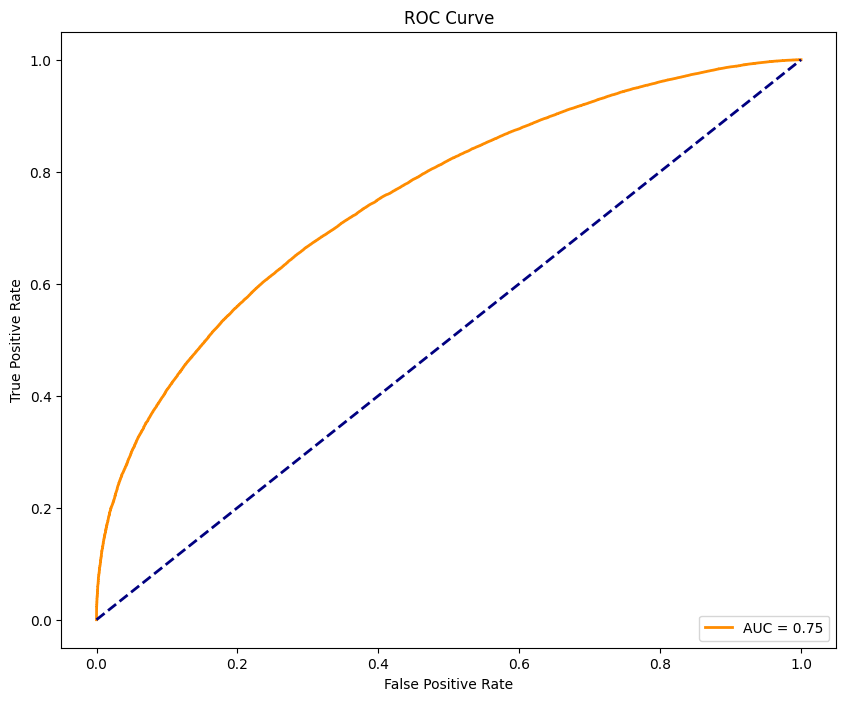

In [269]:
# Получение вероятностей принадлежности к классу 1 для тестового набора
y_probs = model_basa.predict_proba(x_test)[:, 1]
# Рассчитывем ROC-кривую
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
# Рассчитываем AUC (Area Under the Curve) ROC
roc_auc = auc(fpr, tpr)
# Вывод ROC-кривой
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [270]:
# from imblearn.over_sampling import SMOTE
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 142, \
                                                    stratify=y)
# x_train.columns = x_train.columns.astype(str)
# x_train = x_train.astype(float)
# y_train = y_train.astype(float)
# smote = SMOTE(sampling_strategy=0.4, k_neighbors=5, random_state=42)
# X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [271]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 142, \
                                                    stratify=y)
model_basa = CatBoostClassifier(
                         verbose = 100,
                         scale_pos_weight=0.3,
                         iterations=3000,
                         random_seed=142,
                         learning_rate=0.02,
                         eval_metric = 'AUC',   #'TotalF1','Accuracy'
                         task_type="GPU"
                         )
                        
model_basa.fit(x_train, y_train)

Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 12.3ms	remaining: 36.7s
100:	total: 1.2s	remaining: 34.5s
200:	total: 2.34s	remaining: 32.6s
300:	total: 3.47s	remaining: 31.1s
400:	total: 4.66s	remaining: 30.2s
500:	total: 5.88s	remaining: 29.3s
600:	total: 7.13s	remaining: 28.5s
700:	total: 8.42s	remaining: 27.6s
800:	total: 9.73s	remaining: 26.7s
900:	total: 10.9s	remaining: 25.4s
1000:	total: 12.1s	remaining: 24.1s
1100:	total: 13.2s	remaining: 22.8s
1200:	total: 14.4s	remaining: 21.6s
1300:	total: 15.6s	remaining: 20.4s
1400:	total: 16.8s	remaining: 19.2s
1500:	total: 18s	remaining: 18s
1600:	total: 19.2s	remaining: 16.7s
1700:	total: 20.3s	remaining: 15.5s
1800:	total: 21.5s	remaining: 14.3s
1900:	total: 22.6s	remaining: 13.1s
2000:	total: 23.8s	remaining: 11.9s
2100:	total: 25s	remaining: 10.7s
2200:	total: 26.2s	remaining: 9.52s
2300:	total: 27.4s	remaining: 8.33s
2400:	total: 28.7s	remaining: 7.15s
2500:	total: 29.9s	remaining: 5.96s
2600:	total: 31s	remaining: 4.76s
2700:	total: 32.2s	remaining: 3.56s
2800:	total:

In [272]:
print(classification_report(y_test, model_basa.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.41      0.81      0.55     35226
         1.0       0.88      0.54      0.67     89774

    accuracy                           0.62    125000
   macro avg       0.65      0.68      0.61    125000
weighted avg       0.75      0.62      0.64    125000



In [273]:
# Вычисляем F1-меру для 0 класса
f1 = f1_score(y_test, model_basa.predict(x_test), labels=[0], average='weighted')
print(f"F1-мера для класса 0: {f1}")

F1-мера для класса 0: 0.5458712542675911


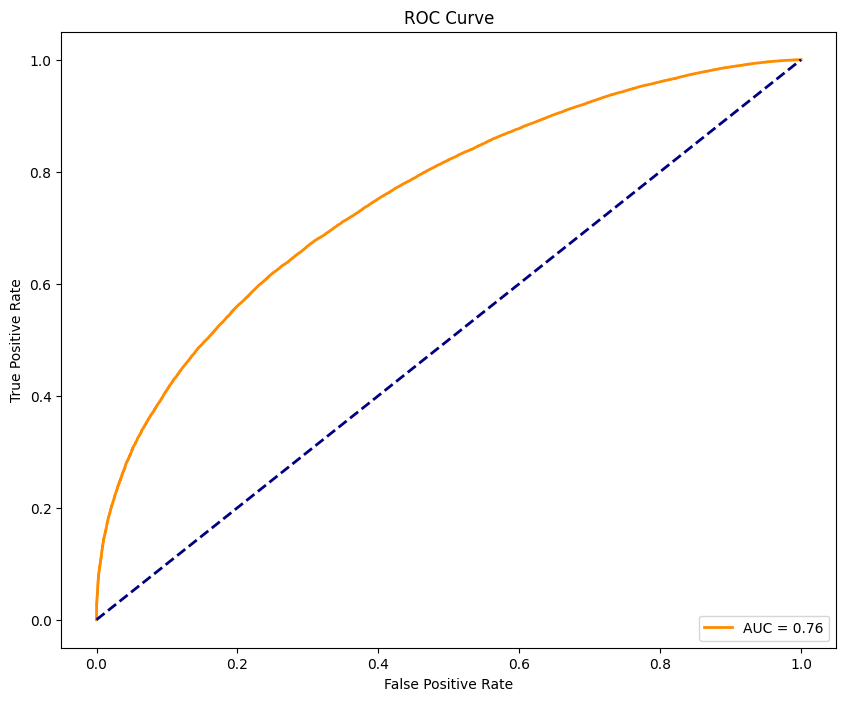

In [274]:
# Получение вероятностей принадлежности к классу 1 для тестового набора
y_probs = model_basa.predict_proba(x_test)[:, 1]
# Рассчитывем ROC-кривую
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
# Рассчитываем AUC (Area Under the Curve) ROC
roc_auc = auc(fpr, tpr)
# Вывод ROC-кривой
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [275]:
# Получаем важность признаков
feature_importance = model_basa.feature_importances_

# Создаем DataFrame с именами признаков и их важностью
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Сортируем по важности в порядке убывания
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Выводим важности признаков
feature_importance_df[feature_importance_df['Importance']>1]['Feature'].values

array(['day_x', 'count_visited_by_day', 'mean_visited_by_60D_x', 'day_y',
       'customer_id', 'hour_count_x', 'mean_visited_by_150D',
       'max_visited_by_100D', 'prc_good_customers', 'day_count_x',
       'mean_visited_by_7D_x', 'mean_visited_by_7D_y',
       'mean_visited_by_14D_y', 'mean_visited_by_21D_x',
       'mean_visited_by_200D', 'count_visited_y', 'count_revenue_x',
       'max_visited_by_200D', 'mean_visited_by_14D_x'], dtype=object)

In [276]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 142, \
                                                    stratify=y)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train,\
                        test_size = 0.25, random_state = 142, stratify=y_train)

total_samples = len(y_train)
num_classes = len(np.unique(y_train))
class_counts = np.bincount(y_train)
class_weights = total_samples / (num_classes * class_counts)

In [277]:
model_class_rf = CatBoostClassifier(
                         verbose = 100,
                         class_weights=class_weights,
                         iterations=2000,
                         random_seed=142,
                         learning_rate=0.02,
                         eval_metric = 'AUC',   #'TotalF1','Accuracy'
                         task_type="GPU"
                         )
                        
model_class_rf.fit(x_train, y_train,eval_set=(x_valid,y_valid))

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7154742	best: 0.7154742 (0)	total: 12.4ms	remaining: 24.9s
100:	test: 0.7418437	best: 0.7418437 (100)	total: 1.07s	remaining: 20.1s
200:	test: 0.7460938	best: 0.7460938 (200)	total: 2.16s	remaining: 19.3s
300:	test: 0.7478647	best: 0.7478647 (300)	total: 3.18s	remaining: 18s
400:	test: 0.7487608	best: 0.7487608 (400)	total: 4.19s	remaining: 16.7s
500:	test: 0.7493668	best: 0.7493668 (500)	total: 5.23s	remaining: 15.6s
600:	test: 0.7497594	best: 0.7497594 (600)	total: 6.24s	remaining: 14.5s
700:	test: 0.7500277	best: 0.7500277 (700)	total: 7.36s	remaining: 13.6s
800:	test: 0.7502598	best: 0.7502598 (800)	total: 8.46s	remaining: 12.7s
900:	test: 0.7504712	best: 0.7504712 (900)	total: 9.57s	remaining: 11.7s
1000:	test: 0.7505791	best: 0.7505791 (1000)	total: 10.7s	remaining: 10.7s
1100:	test: 0.7506722	best: 0.7506722 (1100)	total: 11.8s	remaining: 9.64s
1200:	test: 0.7507813	best: 0.7507813 (1200)	total: 12.9s	remaining: 8.55s
1300:	test: 0.7508399	best: 0.7508523 (1295)	total

In [278]:
print(classification_report(y_test, model_basa.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.41      0.81      0.55     35226
         1.0       0.88      0.54      0.67     89774

    accuracy                           0.62    125000
   macro avg       0.65      0.68      0.61    125000
weighted avg       0.75      0.62      0.64    125000



In [279]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 142, \
                                                    stratify=y)
model_class_rf = CatBoostClassifier(
                         verbose = 100,
                         class_weights=class_weights,
                         iterations=2000,
                         random_seed=142,
                         learning_rate=0.02,
                         eval_metric = 'AUC',   #'TotalF1','Accuracy'
                         task_type="GPU"
                         )
                        
model_class_rf.fit(x_train, y_train)

Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 14.5ms	remaining: 29s
100:	total: 1.18s	remaining: 22.1s
200:	total: 2.3s	remaining: 20.6s
300:	total: 3.46s	remaining: 19.5s
400:	total: 4.75s	remaining: 18.9s
500:	total: 5.94s	remaining: 17.8s
600:	total: 7.17s	remaining: 16.7s
700:	total: 8.45s	remaining: 15.6s
800:	total: 9.65s	remaining: 14.4s
900:	total: 10.8s	remaining: 13.2s
1000:	total: 12s	remaining: 12s
1100:	total: 13.2s	remaining: 10.8s
1200:	total: 14.3s	remaining: 9.53s
1300:	total: 15.5s	remaining: 8.34s
1400:	total: 16.7s	remaining: 7.13s
1500:	total: 17.8s	remaining: 5.92s
1600:	total: 19s	remaining: 4.74s
1700:	total: 20.1s	remaining: 3.54s
1800:	total: 21.3s	remaining: 2.35s
1900:	total: 22.4s	remaining: 1.17s
1999:	total: 23.6s	remaining: 0us


In [280]:
print(classification_report(y_test, model_basa.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.41      0.81      0.55     35226
         1.0       0.88      0.54      0.67     89774

    accuracy                           0.62    125000
   macro avg       0.65      0.68      0.61    125000
weighted avg       0.75      0.62      0.64    125000



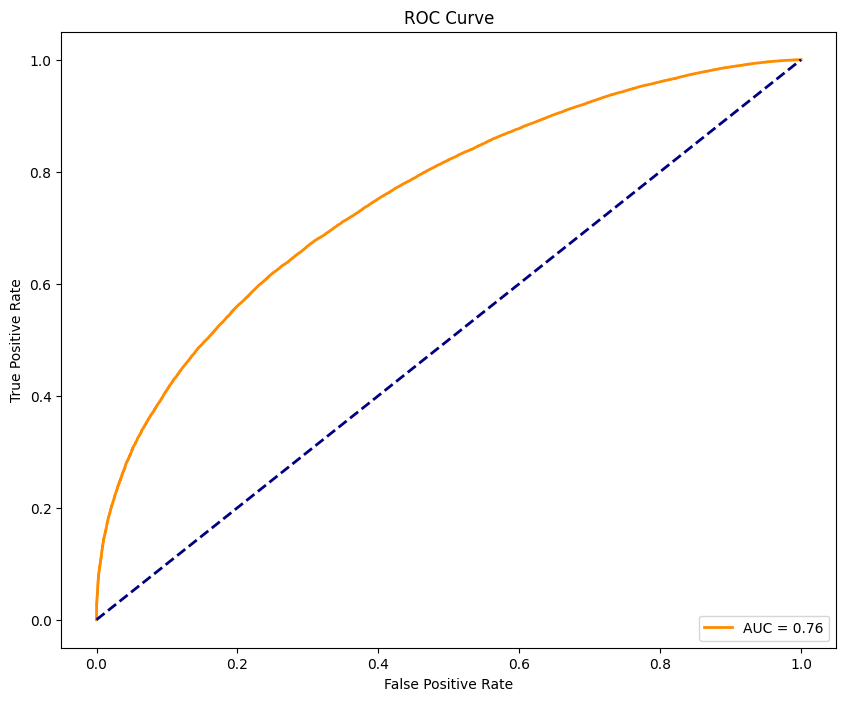

In [281]:
# Получение вероятностей принадлежности к классу 1 для тестового набора
y_probs = model_basa.predict_proba(x_test)[:, 1]
# Рассчитывем ROC-кривую
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
# Рассчитываем AUC (Area Under the Curve) ROC
roc_auc = auc(fpr, tpr)
# Вывод ROC-кривой
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [282]:
# Вычисляем F1-меру 
f1 = f1_score(y_test, model_basa.predict(x_test), labels=[0], average='weighted')

proba_predictions = model_basa.predict_proba(x_test)[:, 1]
best_threshold = 0.5  # начальное значение порога
best_f1_scores = 0
thresholds = np.linspace(0, 1, num=1000)
#thresholds = pd.Series(proba_predictions).unique()
for threshold in tqdm(thresholds):
    predictions = (proba_predictions > threshold).astype(int)
    f1_scores = f1_score(y_test, predictions, labels=[0], average='weighted')

    if f1_scores > best_f1_scores:
        best_f1_scores = f1_scores
        best_threshold = threshold
print(f"F1-мера для класса 0: {f1}")
print(f"Лучший порог: {best_threshold}")
print(f"Максимальная f1: {best_f1_scores}")


  0%|          | 0/1000 [00:00<?, ?it/s]

F1-мера для класса 0: 0.5458712542675911
Лучший порог: 0.45245245245245247
Максимальная f1: 0.551163419350814


F1-мера для класса 0: 0.544240716399845

Лучший порог: 0.43850354557722016

Максимальная f1: 0.5490974267059275

In [283]:
threshold = 0.43850354557722016 #best_threshold

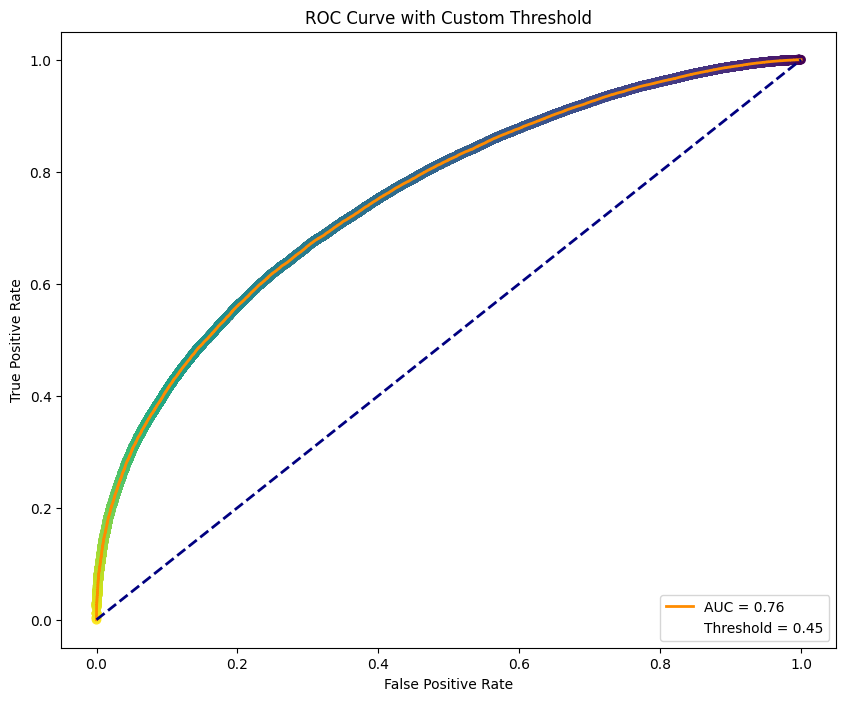

In [284]:
# Задаем порог
threshold = best_threshold  # Замените на свой порог

# Получение вероятностей принадлежности к классу 1 для тестового набора
y_probs = model_basa.predict_proba(x_test)[:, 1]

# Бинаризация вероятностей с использованием заданного порога
y_pred_threshold = (y_probs >= threshold).astype(int)

# Рассчитывем ROC-кривую
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Вывод ROC-кривой с использованием своего порога
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr, tpr, c=thresholds, cmap='viridis', label=f'Threshold = {threshold:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Custom Threshold')
plt.legend(loc='lower right')
plt.show()

In [285]:
# Вычисляем F1-меру 
f1 = f1_score(y_test, model_class_rf.predict(x_test), average='weighted')

proba_predictions = model_class_rf.predict_proba(x_test)[:, 1]
best_threshold = 0.5  # начальное значение порога
best_f1_scores = 0
thresholds = np.linspace(0, 1, num=1000)
#thresholds = pd.Series(proba_predictions).unique()
for threshold in tqdm(thresholds):
    predictions = (proba_predictions > threshold).astype(int)
    f1_scores = f1_score(y_test, predictions, average='weighted')

    if f1_scores > best_f1_scores:
        best_f1_scores = f1_scores
        best_threshold = threshold
print(f"F1-мера для класса 0: {f1}")
print(f"Лучший порог: {best_threshold}")
print(f"Максимальная f1: {best_f1_scores}")
threshold_rf = best_threshold

  0%|          | 0/1000 [00:00<?, ?it/s]

F1-мера для класса 0: 0.6830913582901584
Лучший порог: 0.3763763763763764
Максимальная f1: 0.7298373248052966


In [286]:
y_m = df_target.drop(['group_name','startdatetime','dish_name'], axis=1).groupby(['customer_id']).mean().reset_index()['date_diff_post']

In [287]:
X_f = X.copy()
X_f['buy_post'] = y

In [288]:
x_train, x_test, y_train, y_test = train_test_split(X_f, y_m, test_size = 0.25, random_state = 142, \
                                                    stratify=y)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train,\
                        test_size = 0.25, random_state = 142, stratify=y_train)

model_rg = CatBoostClassifier(
                         verbose = 100,
                         iterations=2000,
                         random_seed=142,
                         learning_rate=0.02,
                         task_type="GPU"
                         )
model_rg.fit(x_train, y_train,eval_set=(x_valid,y_valid))

0:	learn: 3.7702102	test: 3.7702477	best: 3.7702477 (0)	total: 162ms	remaining: 5m 23s
100:	learn: 2.6815691	test: 2.6845482	best: 2.6845482 (100)	total: 15.5s	remaining: 4m 51s
200:	learn: 2.6083947	test: 2.6159472	best: 2.6159472 (200)	total: 30.9s	remaining: 4m 36s
300:	learn: 2.5853960	test: 2.5985617	best: 2.5985617 (300)	total: 45.6s	remaining: 4m 17s
400:	learn: 2.5713989	test: 2.5897108	best: 2.5897108 (400)	total: 59.9s	remaining: 3m 58s
500:	learn: 2.5619442	test: 2.5854180	best: 2.5854180 (500)	total: 1m 13s	remaining: 3m 41s
600:	learn: 2.5549791	test: 2.5828980	best: 2.5828980 (600)	total: 1m 27s	remaining: 3m 24s
700:	learn: 2.5491702	test: 2.5809460	best: 2.5809460 (700)	total: 1m 41s	remaining: 3m 7s
800:	learn: 2.5437964	test: 2.5794863	best: 2.5794863 (800)	total: 1m 54s	remaining: 2m 51s
900:	learn: 2.5396051	test: 2.5790730	best: 2.5790730 (900)	total: 2m 7s	remaining: 2m 35s
1000:	learn: 2.5345138	test: 2.5781347	best: 2.5781292 (998)	total: 2m 21s	remaining: 2m 20

In [289]:
y_pred = model_rg.predict(x_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 15.399487264191622


# Submission

In [290]:
df_test = df_concat[df_concat['group_name'] == 'test']
df_test

,customer_id,group_name,startdatetime,revenue,dish_Бургер,dish_Воппер,dish_Десерты,dish_Кофе,dish_Креветки,dish_Напитки,...,день__Вторник,день__Понедельник,день__Пятница,день__Среда,день__Суббота,день__Четверг,время__day,время__evening,время__morning,revenue_diff
573459,7555059,test,2023-08-01 23:31:03,224.976667,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,224.976667
983539,11632202,test,2023-08-01 23:28:01,186.990000,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,186.990000
3402416,42544167,test,2023-08-01 23:07:15,104.987500,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,104.987500
2887015,31540958,test,2023-08-01 23:00:45,127.772222,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,127.772222
2978277,33397938,test,2023-08-01 22:50:05,116.245000,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,116.245000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515372,19197657,test,2022-09-02 00:57:19,69.990000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,69.990000
2716528,29250460,test,2022-09-02 00:43:56,63.763846,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,63.763846
2546446,28039329,test,2022-09-02 00:19:35,289.990000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,289.990000
2988082,33602398,test,2022-09-02 00:12:26,47.688462,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,47.688462


In [291]:
X_sub = df_test.drop(['group_name', 'startdatetime'], axis=1)
X_sub 

,customer_id,revenue,dish_Бургер,dish_Воппер,dish_Десерты,dish_Кофе,dish_Креветки,dish_Напитки,dish_Пиво,dish_Прочее,...,день__Вторник,день__Понедельник,день__Пятница,день__Среда,день__Суббота,день__Четверг,время__day,время__evening,время__morning,revenue_diff
573459,7555059,224.976667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,224.976667
983539,11632202,186.990000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,186.990000
3402416,42544167,104.987500,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,104.987500
2887015,31540958,127.772222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,127.772222
2978277,33397938,116.245000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,116.245000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515372,19197657,69.990000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,69.990000
2716528,29250460,63.763846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,63.763846
2546446,28039329,289.990000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,289.990000
2988082,33602398,47.688462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,47.688462


In [292]:
X_sub = X_sub.groupby('customer_id').agg(custom_aggregation)
X_sub 

revenue                                     dish_Бургер       \
                     sum        mean         min         max         sum mean   
customer_id                                                                     
52341         322.443155   80.610789   78.564286   83.323333         0.0  0.0   
69175         732.437167   81.381907   62.496667  110.992000         0.0  0.0   
73427        4654.697083  150.151519    1.000000  399.990000         0.0  0.0   
134577        515.245714  128.811429   90.985000  199.995000         0.0  0.0   
156357        372.975333  124.325111   93.993333  149.990000         0.0  0.0   
...                  ...         ...         ...         ...         ...  ...   
46540272      404.136667  134.712222  130.823333  139.990000         0.0  0.0   
46569275      262.763333   87.587778    1.000000  174.990000         0.0  0.0   
46601088      259.476000   86.492000   61.996000  124.990000         0.0  0.0   
46632765      426.640000  142.213333   96.660000  209.990000         0.0  0.0   
46668221      458.096250  152.698750   94.990000  194.990000         0.0  0.0   

                      dish_Воппер       ... время__evening       \
             min  max         sum mean  ...            min  max   
customer_id                             ...                       
52341        0.0  0.0         0.0  0.0  ...            0.0  0.0   
69175        0.0  0.0         0.0  0.0  ...            0.0  1.0   
73427        0.0  0.0         0.0  0.0  ...            0.0  1.0   
134577       0.0  0.0         0.0  0.0  ...            0.0  1.0   
156357       0.0  0.0         0.0  0.0  ...            0.0  0.0   
...          ...  ...         ...  ...  ...            ...  ...   
46540272     0.0  0.0         0.0  0.0  ...            1.0  1.0   
46569275     0.0  0.0         0.0  0.0  ...            1.0  1.0   
46601088     0.0  0.0         0.0  0.0  ...            0.0  0.0   
46632765     0.0  0.0         0.0  0.0  ...            0.0  1.0   
46668221     0.0  0.0         0.0  0.0  ...            1.0  1.0   

            время__morning                     revenue_diff              \
                       sum      mean  min  max          sum        mean   
customer_id                                                               
52341                  0.0  0.000000  0.0  0.0   322.443155   80.610789   
69175                  2.0  0.222222  0.0  1.0   732.437167   81.381907   
73427                  3.0  0.096774  0.0  1.0  4654.697083  150.151519   
134577                 0.0  0.000000  0.0  0.0   515.245714  128.811429   
156357                 1.0  0.333333  0.0  1.0   372.975333  124.325111   
...                    ...       ...  ...  ...          ...         ...   
46540272               0.0  0.000000  0.0  0.0   404.136667  134.712222   
46569275               0.0  0.000000  0.0  0.0   262.763333   87.587778   
46601088               0.0  0.000000  0.0  0.0   259.476000   86.492000   
46632765               0.0  0.000000  0.0  0.0   426.640000  142.213333   
46668221               0.0  0.000000  0.0  0.0   458.096250  152.698750   

                                     
                    min         max  
customer_id                          
52341         78.564286   83.323333  
69175         62.496667  110.992000  
73427          1.000000  399.990000  
134577        90.985000  199.995000  
156357        93.993333  149.990000  
...                 ...         ...  
46540272     130.823333  139.990000  
46569275       1.000000  174.990000  
46601088      61.996000  124.990000  
46632765      96.660000  209.990000  
46668221      94.990000  194.990000  

[112334 rows x 172 columns]

In [293]:
X_sub.columns = X_sub.columns.map(lambda x: '-'.join(map(str, x)))
X_sub 

,revenue-sum,revenue-mean,revenue-min,revenue-max,dish_Бургер-sum,dish_Бургер-mean,dish_Бургер-min,dish_Бургер-max,dish_Воппер-sum,dish_Воппер-mean,...,время__evening-min,время__evening-max,время__morning-sum,время__morning-mean,время__morning-min,время__morning-max,revenue_diff-sum,revenue_diff-mean,revenue_diff-min,revenue_diff-max
customer_id,,,,,,,,,,,,,,,,,,,,,
52341,322.443155,80.610789,78.564286,83.323333,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,322.443155,80.610789,78.564286,83.323333
69175,732.437167,81.381907,62.496667,110.992000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,0.222222,0.0,1.0,732.437167,81.381907,62.496667,110.992000
73427,4654.697083,150.151519,1.000000,399.990000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,3.0,0.096774,0.0,1.0,4654.697083,150.151519,1.000000,399.990000
134577,515.245714,128.811429,90.985000,199.995000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.000000,0.0,0.0,515.245714,128.811429,90.985000,199.995000
156357,372.975333,124.325111,93.993333,149.990000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.333333,0.0,1.0,372.975333,124.325111,93.993333,149.990000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46540272,404.136667,134.712222,130.823333,139.990000,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.000000,0.0,0.0,404.136667,134.712222,130.823333,139.990000
46569275,262.763333,87.587778,1.000000,174.990000,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.000000,0.0,0.0,262.763333,87.587778,1.000000,174.990000
46601088,259.476000,86.492000,61.996000,124.990000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,259.476000,86.492000,61.996000,124.990000


# Фичи из даты и времени

In [294]:
burger_df = pd.read_parquet(file_path_test)

# Раскладываем даты по возможным начениям
burger_df['date'] = burger_df['startdatetime'].dt.date
burger_df['date'] = pd.to_datetime(burger_df['date'])
burger_df['year'] = burger_df['startdatetime'].dt.year
burger_df['month'] = burger_df['startdatetime'].dt.month
burger_df['day'] = burger_df['startdatetime'].dt.day
burger_df['day_of_week'] = burger_df['startdatetime'].dt.day_of_week
burger_df['day_of_year'] = burger_df['startdatetime'].dt.day_of_year
burger_df['days_in_month'] = burger_df['startdatetime'].dt.days_in_month
burger_df['quarter'] = burger_df['startdatetime'].dt.quarter
burger_df['week'] = burger_df['startdatetime'].dt.isocalendar().week
burger_df['hour'] = burger_df['startdatetime'].dt.hour


# Для группировки данных по дням определяем начальную дату и сколько прошло дней с этого момента
date_2022 = datetime.strptime("2022-01-01", "%Y-%m-%d", ).replace(tzinfo=None)
burger_df['day_count'] = ((burger_df['startdatetime'] - date_2022) / np.timedelta64(1, 'D')).astype(int)
# Для группировки данных по три часа также устанавливаем для каждой значения группу
burger_df['hour_count'] = ((burger_df['startdatetime'] - date_2022) / np.timedelta64(3, 'h')).astype(int)
# Создаем датафрейм для итоговых агрегатов по клиентам
customer_df = pd.DataFrame()
# pd.DataFrame(position_by_day_df).reset_index().groupby(by=['customer_id'])['dish_name'].mean()
# burger_df.groupby(by=['customer_id'])['dish_name'].mean()

# Сколько позиций в день
mean_position_by_day = calc_position_by_time(period_column='day_count')
# Сколько позиций в три часа
mean_position_by_3hour = calc_position_by_time(period_column='hour_count')
# Сколько позиций в час
mean_position_by_hour = calc_position_by_time(period_column='hour')

customer_df = pd.concat([customer_df, mean_position_by_day, mean_position_by_3hour, mean_position_by_hour], axis=1)
customer_df.shape

# Формируем сгруппированый датафрейм по посещениям за каждый день по каждому клиенту
visited_days_df = burger_df.groupby(by=['customer_id', 'date'])['dish_name'].count()
visited_days_df = pd.DataFrame(visited_days_df).reset_index()


union_visited_df = pd.DataFrame(visited_days_df.set_index('date').groupby('customer_id')['customer_id'].rolling('1D').count().groupby(by=['customer_id']).count().rename('count_visited'))
for period in ['2D', '3D', '5D', '7D', '14D', '21D', '30D', '60D']:
    print(f'calc period: {period}')
    visited_df = calc_stat_visited_by_period(period=period)
    union_visited_df = pd.concat([union_visited_df, visited_df], axis=1)

customer_df = pd.concat([customer_df, union_visited_df], axis=1)

last_row_burger_columns = ['format_name', 'year', 'month', 'day', 
                         'day_count', 'day_of_week', 'day_of_year', 
                         'days_in_month', 'quarter', 'week', 
                         'hour_count', 'hour', 'date']

last_row_df = burger_df[['customer_id', 'startdatetime'] + last_row_burger_columns].sort_values(by='startdatetime').groupby(by=['customer_id'])[last_row_burger_columns].last()

customer_df_test = pd.concat([customer_df, last_row_df], axis=1)

customer_df_test.reset_index()

calc period: 2D
calc period: 3D
calc period: 5D
calc period: 7D
calc period: 14D
calc period: 21D
calc period: 30D
calc period: 60D


,customer_id,mean_position_by_day_count,mean_position_by_hour_count,mean_position_by_hour,count_visited,max_visited_by_2D,mean_visited_by_2D,max_visited_by_3D,mean_visited_by_3D,max_visited_by_5D,...,day,day_count,day_of_week,day_of_year,days_in_month,quarter,week,hour_count,hour,date
0,52341,7.000000,7.000000,14.000000,4,1.0,1.000000,1.0,1.000000,1.0,...,8,431,2,67,31,1,10,3452,14,2023-03-08
1,69175,7.000000,5.444444,8.166667,7,2.0,1.285714,2.0,1.285714,3.0,...,27,572,3,208,31,3,30,4582,19,2023-07-27
2,73427,2.461538,2.206897,4.266667,26,2.0,1.346154,3.0,1.846154,4.0,...,1,424,2,60,31,1,9,3396,13,2023-03-01
3,134577,6.000000,6.000000,6.000000,2,1.0,1.000000,1.0,1.000000,1.0,...,25,267,6,268,30,3,38,2141,16,2022-09-25
4,156357,4.333333,4.333333,4.333333,3,1.0,1.000000,1.0,1.000000,1.0,...,29,393,6,29,31,1,4,3149,17,2023-01-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112329,46540272,10.000000,5.000000,5.000000,1,1.0,1.000000,1.0,1.000000,1.0,...,28,573,4,209,31,3,30,4591,21,2023-07-28
112330,46569275,6.000000,6.000000,6.000000,2,1.0,1.000000,2.0,1.500000,2.0,...,31,576,0,212,31,3,31,4614,18,2023-07-31
112331,46601088,4.000000,4.000000,2.666667,2,2.0,1.500000,2.0,1.500000,2.0,...,31,576,0,212,31,3,31,4613,17,2023-07-31
112332,46632765,3.000000,2.000000,2.000000,2,2.0,1.500000,2.0,1.500000,2.0,...,1,577,1,213,31,3,31,4621,17,2023-08-01


In [295]:
X_sub = pd.merge(X_sub, customer_df_test.reset_index(), on='customer_id')
X_sub = pd.merge(X_sub, t, on='customer_id')
X_sub = pd.merge(X_sub, t_i, on='customer_id')
X_sub = X_sub[col]

In [297]:
X_sub['Y_pred'] = (model_basa.predict_proba(X_sub)[:, 1]>0.43850354557722016).astype(float)
X_sub['Y_pred']

0         1.0
1         1.0
2         1.0
3         0.0
4         0.0
         ... 
112329    0.0
112330    0.0
112331    0.0
112332    1.0
112333    0.0
Name: Y_pred, Length: 112334, dtype: float64

In [300]:
df_sub = pd.read_csv(r'C:\Users\user\Downloads\submission.csv', sep=';')
df_sub

,customer_id,date_diff_post,buy_post
0,13220760,0,0
1,30315975,0,0
2,21679985,0,0
3,29754274,0,0
4,7797823,0,0
...,...,...,...
112329,14023374,0,0
112330,34923292,0,0
112331,32761835,0,0
112332,38322785,0,0


In [301]:
df_sub['buy_post'] = pd.merge(df_sub[['customer_id','buy_post']], X_sub[['customer_id','Y_pred']], on='customer_id')['Y_pred']

In [302]:
X_sub['buy_post'] = (model_class_rf.predict_proba(X_sub.drop(['Y_pred'],axis=1))[:, 1]>threshold_rf).astype(float)
X_sub['Y_pred'] = model_rg.predict(X_sub.drop(['Y_pred'],axis=1))
df_sub['date_diff_post'] = pd.merge(df_sub[['customer_id','buy_post']], X_sub[['customer_id','Y_pred']], on='customer_id')['Y_pred']

In [303]:
df_sub

,customer_id,date_diff_post,buy_post
0,13220760,1.0,1.0
1,30315975,0.0,0.0
2,21679985,10.0,1.0
3,29754274,14.0,1.0
4,7797823,10.0,1.0
...,...,...,...
112329,14023374,16.0,0.0
112330,34923292,0.0,0.0
112331,32761835,0.0,0.0
112332,38322785,0.0,0.0


In [304]:
# Установить значение date_diff_post равным 0, если buy_post равен 0
condition = (df_sub['buy_post'] == 0) & (df_sub['date_diff_post'] > 0)
df_sub.loc[condition, 'date_diff_post'] = 0

# # Установить случайное значение от 1 до 60, если buy_post равен 1 и date_diff_post равен 0
# condition = (df_sub['buy_post'] == 1) & (df_sub['date_diff_post'] == 0)
# df_sub.loc[condition, 'date_diff_post'] = np.random.randint(1, 61, condition.sum())

In [305]:
df_sub

,customer_id,date_diff_post,buy_post
0,13220760,1.0,1.0
1,30315975,0.0,0.0
2,21679985,10.0,1.0
3,29754274,14.0,1.0
4,7797823,10.0,1.0
...,...,...,...
112329,14023374,0.0,0.0
112330,34923292,0.0,0.0
112331,32761835,0.0,0.0
112332,38322785,0.0,0.0


In [306]:
df_sub.to_csv(r'I:\submissionV34.csv', sep=';', index=False)

In [307]:
pd.read_csv(r'I:\submissionV34.csv', sep=';')

,customer_id,date_diff_post,buy_post
0,13220760,1.0,1.0
1,30315975,0.0,0.0
2,21679985,10.0,1.0
3,29754274,14.0,1.0
4,7797823,10.0,1.0
...,...,...,...
112329,14023374,0.0,0.0
112330,34923292,0.0,0.0
112331,32761835,0.0,0.0
112332,38322785,0.0,0.0


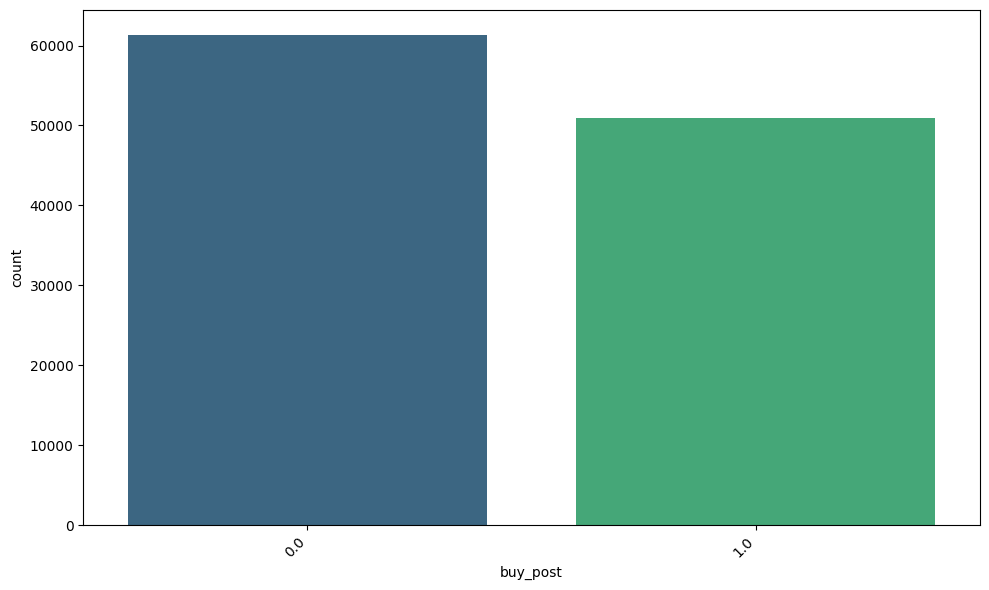

In [308]:
plt.figure(figsize=(10, 6))
sns.barplot(x='buy_post', y='count', data=df_sub['buy_post'].value_counts().reset_index(), palette='viridis')

plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

In [309]:
df_sub['buy_post'].value_counts().reset_index()

,buy_post,count
0,0.0,61373
1,1.0,50961


In [310]:
xx['buy_post'].value_counts().reset_index()

,buy_post,count
0,1,359095
1,0,140905


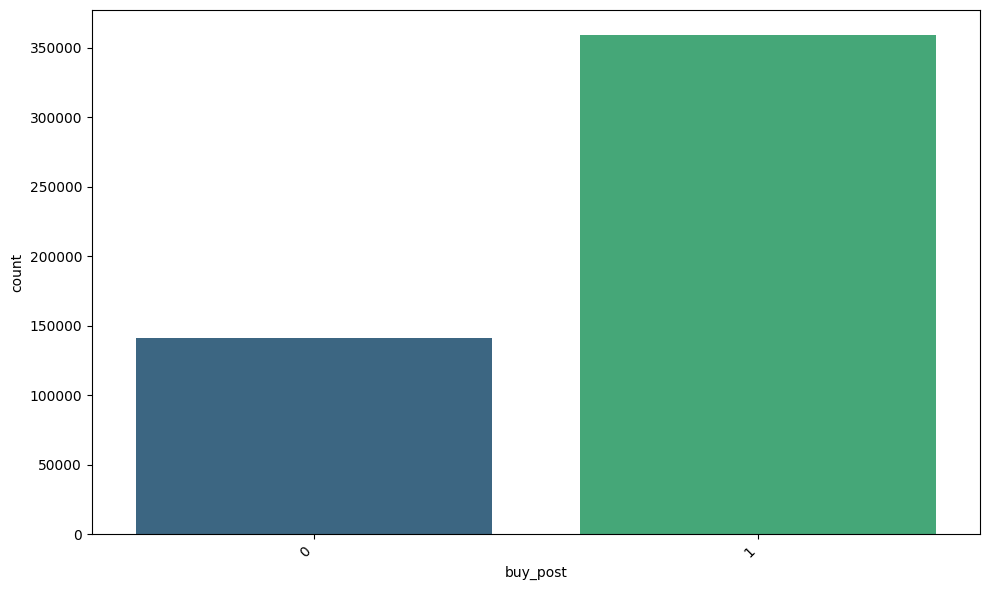

In [311]:
plt.figure(figsize=(10, 6))
sns.barplot(x='buy_post', y='count', data=xx['buy_post'].value_counts().reset_index(), palette='viridis')

plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()